In [3]:
!apt install cmake libopenmpi-dev zlib1g-dev 
#installing dependencies otherwise pip installation will throw error
!pip install stable-baselines


Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13 libfabric1
  libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev libibverbs1
  libjsoncpp1 libltdl-dev libltdl7 liblzo2-2 libmagic-mgc libmagic1
  libnl-3-200 libnl-route-3-200 libnuma-dev libnuma1 libopenmpi2 libpciaccess0
  libpsm-infinipath1 librdmacm1 librhash0 libtool libuv1 ocl-icd-libopencl1
  openmpi-bin openmpi-common
Suggested packages:
  cmake-doc ninja-build lrzip libhwloc-contrib-plugins libtool-doc openmpi-doc
  pciutils autoconf automaken gcj-jdk
The following NEW packages will be installed:
  autotools-dev cmake cmake-data file ibverbs-providers libarchive13
  libfabric1 libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev
  libibverbs1 libjsoncpp1 liblt

In [0]:
import gym
from stable_baselines.common.atari_wrappers import make_atari
from stable_baselines.deepq.policies import MlpPolicy, CnnPolicy
from stable_baselines import DQN
import matplotlib.pyplot as plt
import numpy as np
import os
import gym
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy


In [0]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
    n_steps += 1
    return False

In [0]:
# Create log dir
log_dir = "/tmp/gym/atari/"
os.makedirs(log_dir, exist_ok=True)


In [7]:
#Declaring  Environments
env = make_atari('BreakoutNoFrameskip-v4')
env = Monitor(env, log_dir, allow_early_resets=True)

model = DQN(CnnPolicy, env, verbose=1)
model.learn(total_timesteps=25000,callback=callback)
#model.save("deepq_breakout")

# del model # remove to demonstrate saving and loading

# DQN.load("deepq_breakout")
#episode_rewards=[]
#obs = env.reset()
#while True:
#    action, _states = model.predict(obs)
#    obs, rewards, dones, info = env.step(action)
    #env.render()
#    plt.figure()
 #   plt.imshow(env.render(mode='rgb_array'))
  #  plt.show()
#    episode_rewards.append(rewards)


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


842 timesteps
Best mean reward: -inf - Last mean reward per episode: 1.00
Saving new best model
1904 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 1.67
Saving new best model
2966 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.50
3529 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.53
4653 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.28
5682 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.20
6076 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.24
7747 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.08
8977 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.15
9601 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.11
10631 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.07
11620 timesteps
Best mean reward: 1.67 - Last mean reward per episode: 1.10
12681 timesteps
Best mean reward: 1.67 - Last mean rewa

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve of Atari BreakoutNoFrameskip'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    #y1 = movingAverage(y, window=50)
    # Truncate x
    #if(len(x)>len(y)):
    #x1 = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title)
    plt.show() 
    
    #fig = plt.figure(title)
    #plt.plot(x1, y1)
    #plt.xlabel('Number of Timesteps')
    #plt.ylabel('Rewards')
    #plt.title(title + " Smoothed")
    #plt.show()


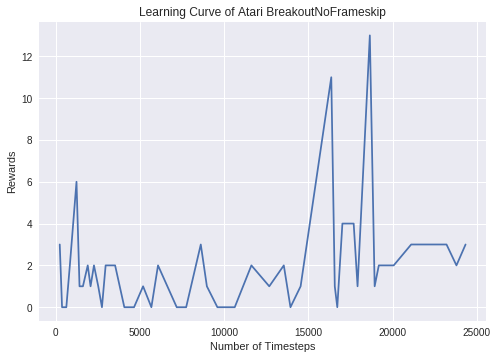

In [12]:
plot_results(log_dir)